# Problem Set 5, due May 30 at 11:59am, mid-day, noon.

As usual, you are highly encouraged to start this problem set early.  There are a lot of components to this problem set, but my hope is that no single problem will take too much time. There are several opportunities to earn extra credit in this problem set, and Part 3 gives you considerable leeway in how thorough to make your analysis.

## Part 1: Principal Component Analysis

Just when you thought you were *finally* done with the [Boston Housing Prices Data Set](http://archive.ics.uci.edu/ml/datasets/Housing), it has come back to haunt you for a few more minutes.  Make sure you're up and running as you were on the previous problem set:

In [48]:
import matplotlib.pyplot as plt
import numpy as np

from sklearn.cross_validation import train_test_split
from sklearn.decomposition import PCA
from sklearn.datasets import load_boston
from sklearn.linear_model import LinearRegression
%matplotlib inline

bdata = load_boston()

# Setup indices
indx = {feature: index for index, feature in enumerate(bdata.feature_names)}

# Matplotlib setup
font = {'size': 14}

plt.rc('font', **font)

### 1.1 Yet another scatterplot

Use matplotlib to create a scatter plot that shows the relationship between the median value of the home (y-axis) and the per-capita crime rate (x-axis).  Then, just use the [Linear Regression class](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html) from sklearn or the [OLS class](http://wiki.scipy.org/Cookbook/OLS) from SciPy to regress median housing price on average number of rooms per house.  Use a training set consisting of 66% of your instances to fit your regression model.  Report the RMSE on the training and test set.

Regression for MEDV ~ CRIM:
	Coefficients: [-0.4550384]
	Intercept: 24.5499847418
	Residual mean square error training: 8.77
	Residual mean square error testing: 7.93


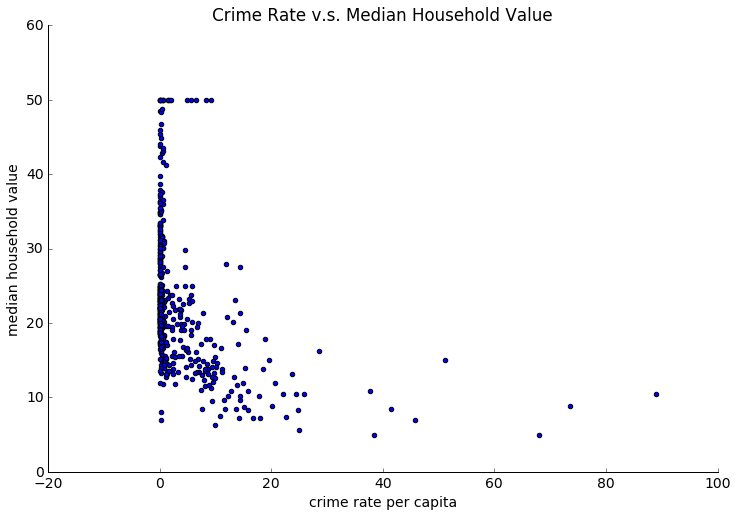

In [80]:
# Simplify the axes of the figure for presentation.
def simple_axes(ax):
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.get_xaxis().tick_bottom()
    ax.get_yaxis().tick_left()

plt.figure(figsize=(12, 8))
plt.scatter(bdata.data[:, np.newaxis, indx['CRIM']], bdata.target)
plt.title('Crime Rate v.s. Median Household Value')
plt.xlabel('crime rate per capita')
plt.ylabel('median household value')
simple_axes(plt.axes())

boston_train, boston_test, boston_medv_train, boston_medv_test = train_test_split(
    bdata.data, bdata.target, train_size=0.66, random_state=42)

boston_crim_train = boston_train[:, np.newaxis, indx['CRIM']]
boston_crim_test = boston_test[:, np.newaxis, indx['CRIM']]

crim_medv_reg = LinearRegression()
crim_medv_reg.fit(boston_crim_train, boston_medv_train)

print 'Regression for MEDV ~ CRIM:'
print '\tCoefficients:', crim_medv_reg.coef_
print '\tIntercept:', crim_medv_reg.intercept_
print('\tResidual mean square error training: %.2f'
      % np.sqrt(np.mean((crim_medv_reg.predict(boston_crim_train) - boston_medv_train) ** 2)))
print('\tResidual mean square error testing: %.2f'
      % np.sqrt(np.mean((crim_medv_reg.predict(boston_crim_test) - boston_medv_test) ** 2)))



### 1.2 Scatterplot matrices

Choose 8 out of the of the 14 features of the housing data that you think are most interesting to study.  Create an 8x8 grid of scatterplots showing how each of these variables relate to each other.  You want to produce something that looks generally like [this image](http://iogas.net/wp-content/gallery/iogas-evaluation/scatterplot-matrix-point-density.png).

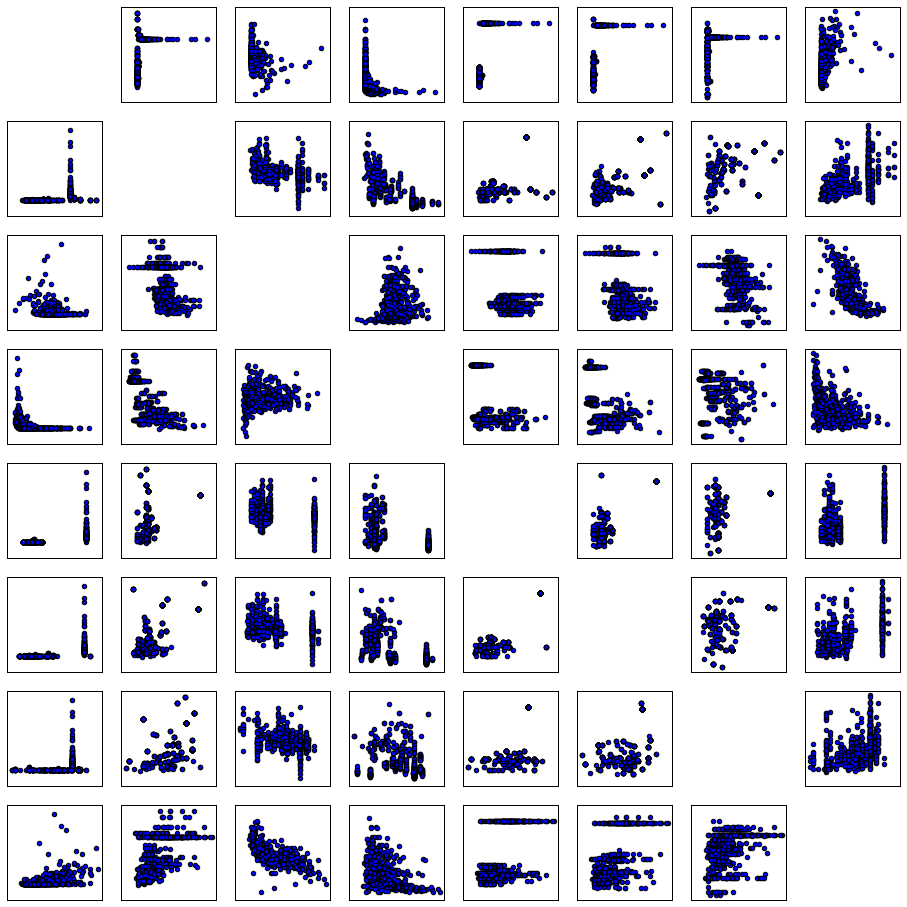

In [79]:
chosen_features = ['CRIM', 'INDUS', 'RM', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'LSTAT']
    
plt.figure(figsize=(16,16))
for i in xrange(8):
    for j in xrange(8):
        if i == j:
            continue
        ax = plt.subplot(8, 8, i * 8 + j + 1)
        plt.scatter(bdata.data[:, np.newaxis, indx[chosen_features[i]]],
                    bdata.data[:, np.newaxis, indx[chosen_features[j]]])
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)

### 1.3 PCA to the rescue

Run principal component analysis using [PCA](http://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html) from sklearn to find the first 12 principal components of your data.  Use only your training set (66% of the data), and use all features *except* the median housing price.  Create a figure showing how the amount of variance explained by your components increases as you increase the number of components from 1 to 12.

[  8.01174426e-01   1.66578745e-01   2.28089547e-02   6.67934095e-03
   1.07751622e-03   8.42451801e-04   4.56378316e-04   2.48245671e-04
   9.20486455e-05   3.27177932e-05   7.33637379e-06   1.75912661e-06]


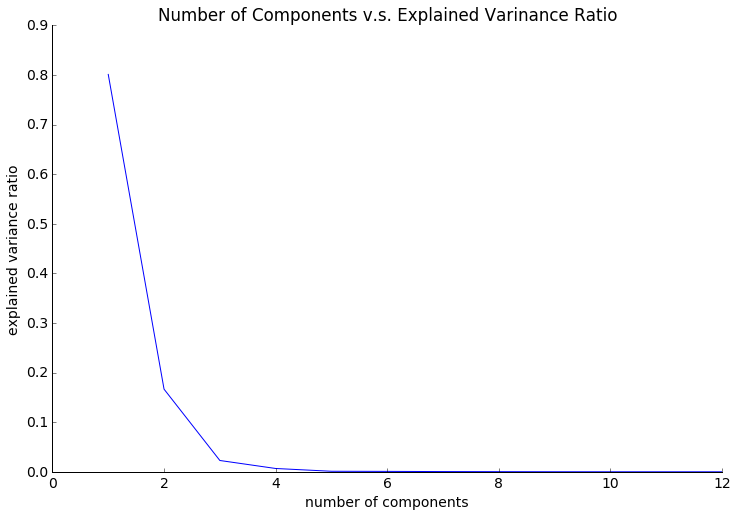

In [99]:
boston_pca = PCA(n_components=12)
boston_pca.fit(boston_train)
print boston_pca.explained_variance_ratio_
plt.figure(figsize=(12,8))
plt.plot(np.arange(1, boston_pca.n_components + 1, 1), boston_pca.explained_variance_ratio_)
plt.title('Number of Components v.s. Explained Varinance Ratio')
plt.xlabel('number of components')
plt.ylabel('explained variance ratio')
simple_axes(plt.axes())

### 1.4 Visualizing the components

Create a 1X3 grid containing three scatter plots of your training data:

1. PCA 1 vs. PCA 2 (you will need to use `fit_transform` to project your training data onto these two components)
2. PCA 1 (x-axis) vs. median housing value
3. PCA 2 vs. median housing value

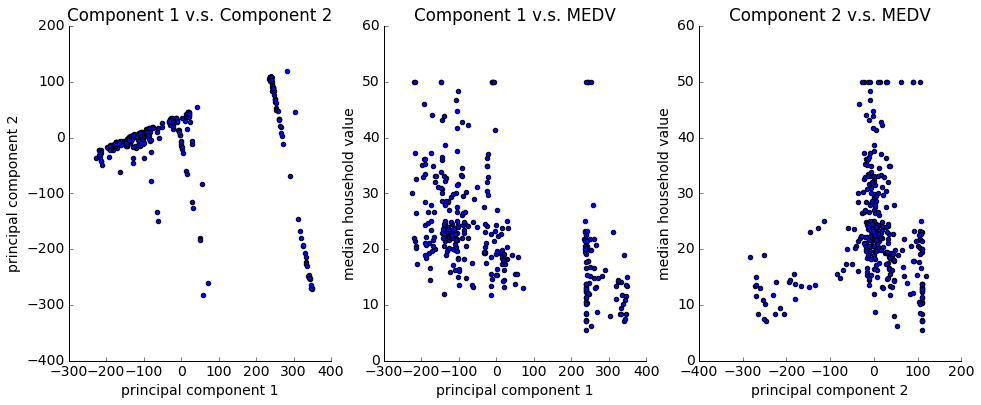

In [132]:
pca2 = PCA(n_components=2)
components = pca2.fit_transform(boston_train)

component1 = components[:, np.newaxis, 0]
component2 = components[:, np.newaxis, 1]

plt.figure(figsize=(16,6))
ax1 = plt.subplot(1, 3, 1)
ax1.scatter(component1, component2)
ax1.set_title('Component 1 v.s. Component 2')
ax1.set_xlabel('principal component 1')
ax1.set_ylabel('principal component 2')
simple_axes(ax1.axes)

ax2 = plt.subplot(1, 3, 2)
ax2.scatter(component1, boston_medv_train)
ax2.set_title('Component 1 v.s. MEDV')
ax2.set_xlabel('principal component 1')
ax2.set_ylabel('median household value')
simple_axes(ax2.axes)

ax3 = plt.subplot(1, 3, 3)
ax3.scatter(component2, boston_medv_train)
ax3.set_title('Component 2 v.s. MEDV')
ax3.set_xlabel('principal component 2')
ax3.set_ylabel('median household value')
simple_axes(ax3.axes)

### 1.5 Regression and PCA

Using just the first Principal Component learned on the training data, project all of your data (including the test data) onto this 1-dimensional subspace using the `fit_transform` function.  Now, using your training data, fit a regression of median housing price on this first principal component of your data.  Report the RMSE of this regression for both the training and test set.  How do these results compare to your results from 1.1?  Interpret your results!

In [144]:
component1_train = pca2.fit_transform(boston_train)[:, [0]]
component1_test = pca2.fit_transform(boston_test)[:, [0]]

pca_reg = LinearRegression()
pca_reg.fit(component1_train, boston_medv_train)

print 'Regression for MEDV ~ PCA1:'
print '\tCoefficients:', pca_reg.coef_
print '\tIntercept:', pca_reg.intercept_
print('\tResidual mean square error training: %.2f'
      % np.sqrt(np.mean((pca_reg.predict(component1_train) - boston_medv_train) ** 2)))
print('\tResidual mean square error testing: %.2f'
      % np.sqrt(np.mean((pca_reg.predict(component1_test) - boston_medv_test) ** 2)))


Regression for MEDV ~ PCA1:
	Coefficients: [-0.02587721]
	Intercept: 23.0267267267
	Residual mean square error training: 8.33
	Residual mean square error testing: 7.45


It seems that the regression using PCA and the simple regression with CRIM data from the previous section are very similar. The RMSE values for both the training and the testing sets are too close to distinguish between the two.

## Part 2: Trees and Forests

You should use the [Decision Tree](http://scikit-learn.org/stable/modules/tree.html#tree) libraries in sklearn for this problem.

### 2.1 Binary features, binary outcome

Convert a few of the continuous variables to binary indicators: Create a new variable (EXPENSIVE) to indicate whether the median housing price is more than $400,000.  Create a new binary variable HIGH_CRIME, which is 1 iff CRIM>10. Create another new binary variable BIG which is 1 iff RM>6.

Using 10-fold cross-validation, use [DecisionTreeClassifier](http://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html#sklearn.tree.DecisionTreeClassifier) to fit a decision tree that predicts EXPENSIVE based on the values of HIGH_CRIME, BIG, and CHAS. Report the average training and testing accuracy across your 10 folds, and show a diagram of the tree (at least the first three levels).

In [3]:
from sklearn import tree
# Enter your code here

*Enter your observations here*

### 2.2 Tree diagram

Use all of the data to re-fit a single decision tree with max_depth = 4 (i.e., no cross-validation). Then, use the built-in sklearn libraries to create a diagram of the tree itself. Interpret what you see.

In [ ]:
# Enter your code here

*Enter your observations here*

### Extra Credit: Sensitivity analysis
The built-in algorithm you are using has several parameters which you can tune. Using cross-validation, show how the choice of max_depth and min_samples_leaf affects test accuracy. To do this, create a 3-D plot where the x-axis is max_depth, the y-axis is min_samples_leaf, and the z-axis shows accuracy. What combination of max_depth and min-samples_leaf achieves the highest accuracy?

In [ ]:
# Enter your code here

*Enter your observations here*

### 2.3 Regression Trees
Use the [DecisionTreeRegressor](http://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeRegressor.html#sklearn.tree.DecisionTreeRegressor) function to predict median housing value based on your favorite set of covariates. Report the average 10-fold cross-validated RMSE, separately for the training data and for the testing data. 

How do your RMSE values compare to those you obtained using nearest neighbors, and (regularized) linear regression?

In [ ]:
# Enter your code here

*Enter your observations here*

### 2.4 Build your own random forest
Using your model from 2.1, build a forest of 100 trees. Do this manually, i.e., don't rely on existing packages.

To accomplish this, first split your data into 10 folds for cross validation. For each fold, take the training data and use bootstrap resampling of your original data to construct 100 new training datasets (each one should be slightly different!). Then, using your optimal values of max_depth and min_samples_leaf from earlier, fit a separate decision tree to each sample. Classify each of your test instances as the class chosen by the majority of the 100 trees. Repeat this process for each of your 10 folds.

What is the cross-validated accuracy of your random forest classifier? How does it compare to the results from 2.1? Is this what you expected? Why or why not?

In [ ]:
# Enter your code here

*Enter your observations here*

### Extra Credit: Implement a Decision Tree in Python

For extra credit, put away the canned algorithm from sklearn, and write your own decision tree algorithm. Use the simple recursive algorithm we described in class, and train it on the boston housing prices data. Use the target variable  EXPENSIVE, and the following three binary input variables: CHAS, HIGH_CRIME, BIG.

Do not worry about implementing bells and whistles. However, you will definitely need the following:
 * A "BuildTree" function that implements the recursive algorithm
 * A function to calculate information gain
 
For this problem, you can consult the internets to see how other have done this. However, you must make your code your own - do not plagiarize the examples of other peoples. Implement the minimum required code to build a decision tree

In [1]:
# Enter your code here

## Part 3: Putting together the pieces

At this point, you have learned the nuts and bolts of a large number of machine learning algorithms. This includes: 
* Nearest Neighbor
* k-Nearest Neighbors
* Linear Regression
* Logistic Regression
* LASSO / Ridge Regression
* Support Vector Machines
* Naive Bayes
* Decision Trees
* Regression Trees
* Random Forests
* Adaboost
* Perceptrons
* Neural Networks

Your mission now is to use your knowledge of supervised machine learning to try an predict which passengers aboard the Titanic were most likely to survive. The prompts for this part of the problem set are deliberately vague - the goal is to leave it up to you how to structure (most of) your analysis.

To get started, read about the prediction problem on [Kaggle](https://www.kaggle.com/c/titanic). Then, download the data [here](https://www.kaggle.com/c/titanic/data) - you'll want at least the train and test data, maybe more.

### 3.1 Exploratory data analysis

Create a few figures and tables that help give you a feel for the data.

In [ ]:
# Enter your code here

*Enter your observations here*

### 3.2 Correlates of survival

Use whatever methods you can think of to try and figure out what factors seem to determine whether or not a person would survive the sinking of the Titanic. What do you conclude?

In [ ]:
# Enter your code here

*Enter your observations here*

### 3.3 Predict survival

Use 2-3 different machine learning algorithms to predict who will survive the titanic. Use whatever variables you like, but make sure to understand what you are doing, i.e., don't blindly use a variable without understanding what it signifies, how it is coded (e.g., should a categorical variable be converted into a set of fixed effects?), whether it is missing observations, and so forth. Feel free to use built-in libraries, but make sure to cross-validate your model (on the training set!), and then report the test accuracy. How effectively can you predict survival, and what model works best?

In [ ]:
# Enter your code here

*Enter your observations here*

### Extra Credit: Develop an ensemble

Create an ensemble learner by hand. Using all of the training data, fit as many different machine learning algorithms as you can. Then, to classify each instance in the test data, take the majority vote of all of your different fitted models. How accurately do you predict survival? How does this compare to your earlier results? 

*Note:* It will make your life easier if you use an odd number of algorithms!

In [1]:
# Enter your code here

*Enter your observations here*